In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
ex = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
print(train_data.shape, test_data.shape)

(891, 12) (418, 11)


In [4]:
X = train_data.drop(["Name", "Ticket", "PassengerId", "Survived"], axis=1)
X["Cabin"] = np.where(X["Cabin"].isna(), 0, 1)
X = pd.get_dummies(X, columns = ["Sex", "Embarked"], drop_first=True, dtype=int).values
y = train_data["Survived"].values

In [5]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier(), "SGD": SGDClassifier(), "MLP" : MLPClassifier(max_iter=500)}
results_acc = []
results_f1 = []
for model in models.values():
    steps = [("impute", SimpleImputer()),
            ("scale", MinMaxScaler()),
            ("model", model)]

    pipeline = Pipeline(steps)
    kf = KFold(n_splits = 10, shuffle=True, random_state=1)
    cv_results_acc = cross_val_score(pipeline, X, y, cv=kf)
    cv_results_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring='f1')
    results_acc.append(cv_results_acc)
    results_f1.append(cv_results_f1)

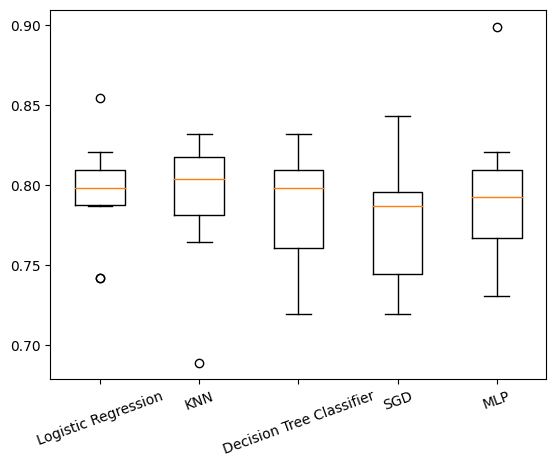

In [6]:
plt.boxplot(results_acc, labels=models.keys())
plt.xticks(rotation=20)
plt.show()

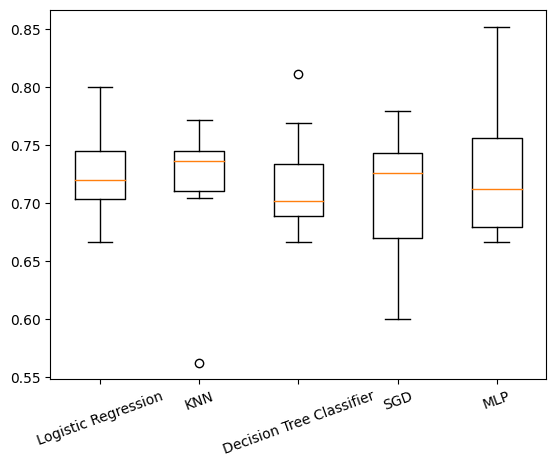

In [7]:
plt.boxplot(results_f1, labels=models.keys())
plt.xticks(rotation=20)
plt.show()

In [8]:
steps = [("impute", SimpleImputer()),
        ("scale", StandardScaler()),
        ("model", KNeighborsClassifier())]

pipeline = Pipeline(steps)

In [9]:
param_grid = {"model__n_neighbors":range(1,20), 
              'model__weights' : ['uniform', 'distance'],
              'model__metric' : ['minkowski','euclidean','manhattan']}
clf = GridSearchCV(pipeline, param_grid, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('impute', SimpleImputer()),
                                       ('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__metric': ['minkowski', 'euclidean',
                                           'manhattan'],
                         'model__n_neighbors': range(1, 20),
                         'model__weights': ['uniform', 'distance']})

In [10]:
print(clf.best_params_, clf.best_score_)

{'model__metric': 'manhattan', 'model__n_neighbors': 8, 'model__weights': 'uniform'} 0.8125701459034792


In [11]:
steps = [("impute", SimpleImputer()),
        ("scale", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=8, metric="manhattan", weights="uniform"))]
pipeline = Pipeline(steps)
pipeline.fit(X,y)
pipeline.score(X,y)

0.8417508417508418

In [12]:
X_test = test_data.drop(["Name", "Ticket", "PassengerId"], axis=1)
X_test["Cabin"] = np.where(X_test["Cabin"].isna(), 0, 1)
X_test = pd.get_dummies(X_test, columns = ["Sex", "Embarked"], drop_first=True, dtype=int).values


In [13]:
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"].values, "Survived": pipeline.predict(X_test)})

In [14]:
submission.shape

(418, 2)

In [15]:
ex.shape

(418, 2)

In [16]:
submission.to_csv("submission.csv", index=False)

In [17]:
kf = KFold(n_splits = 6, shuffle=True, random_state=1)
cv_scores = cross_val_score(pipeline, X, y, cv=kf)

In [18]:
steps = [("impute", SimpleImputer()),
            ("scale", MinMaxScaler()),
            ("model", model)]

pipeline = Pipeline(steps)
kf = KFold(n_splits = 10, shuffle=True, random_state=1)
cv_results_acc = cross_val_score(pipeline, X, y, cv=kf)
cv_results_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring='f1')
results_acc.append(cv_results_acc)
results_f1.append(cv_results_f1)

(array([608., 209.,  28.,  16.,  18.,   5.,   0.,   7.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

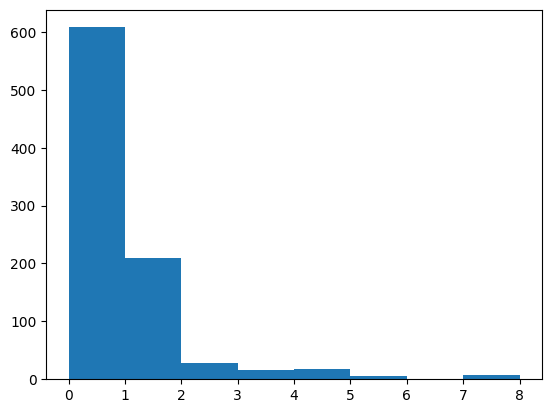

In [19]:
plt.hist(train_data["SibSp"], bins=8)

In [20]:
train_data.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
